In [31]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# 設計loss function=(1-sin(sinx))x^2

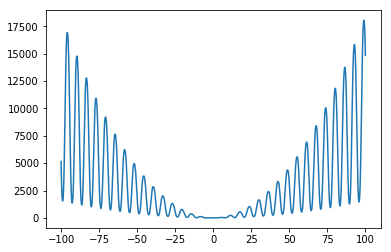

In [44]:
def loss_function(x):
    y=(1-np.sin(np.sin(x)))*(x**2)
    return y

L=100
x=np.linspace(-L,L,100*L)
plt.plot(x,loss_function(x))

# 導函數=(1-sin(sinx))2x+(-cos(sin(x))cos(x))x^2

In [45]:
def gradient_function(x):
    y=2*x*(1-np.sin(np.sin(x)))+(-np.cos(np.sin(x))*np.cos(x))*(x**2)
    return y

# 設計gradient_descent主程式

In [83]:
def gradient_descent(L1,L2,num,learning_rate,tolerance):
    distance=int(L2-L1)
    x=np.linspace(L1,L2,100*distance)
    position=np.linspace(L2-0.9*distance,L2-0.1*distance,num)
    
    learning_rate=10**(-learning_rate)
    
    tol=10**(-tolerance)
    
    t=1
    square_sum=np.zeros(len(position))
    rms=np.zeros(len(position))
    
    g=gradient_function(position)
    while True:
        
        lr=learning_rate/np.power(t,0.5)
        
        for i in range(0,len(position)):
            
            if abs(g[i])>tol:
                
                g[i]=gradient_function(position[i])
                
                square_sum[i]=square_sum[i]+np.power(g[i],2)
                
                rms[i]=np.power(square_sum[i]/t,0.5)
                
                position[i]=position[i]-lr*g[i]/rms[i]
                
        clear_output(wait=True)
        for i in range(0,len(position)):
            if num<10:
                print('第',i,'位置:',position[i])
                if rms[i] !=0:
                    print('learning_rate:',lr/rms[i])
                print('gradient:',g[i])
                print('=========================')
        plt.plot(x,loss_function(x))
        plt.scatter(position,loss_function(position),c='r')
        plt.show()
        time.sleep(0.1)
        t+=1
        
        if False not in (abs(g)<=tol):
            for i in range(0,len(position)):
                if loss_function(position[i])==min(loss_function(position)):
                    print('局部最小值位於:',position[i])
            break
        

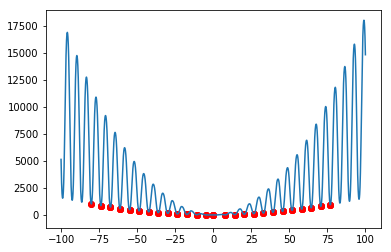

局部最小值位於: 9.264924269446179e-12


In [85]:
#gradient_descent(前端,後端,測試數目,learning_rate=10^-n,tolerance=10^-n)
gradient_descent(-100,100,100,0,10)